In [1]:
from ipywidgets import interact
# add utils
import sys
sys.path.append('../../the_original_problem/')


# sample script imports
import numpy as np
import glob
from easydict import EasyDict
from matplotlib.pyplot import imread

In [2]:
#path variables
data_path = '../../the_original_problem/data'

In [3]:
# for function structure idea - default layout
def classify_random(im):
    '''
    Example submission for coding challenge. 
    
    Args: im (nxmx3) unsigned 8-bit color image 
    Returns: One of three strings: 'brick', 'ball', or 'cylinder'
    
    '''
    #Let's guess randomly! Maybe we'll get lucky.
    labels = ['brick', 'ball', 'cylinder']
    random_integer = np.random.randint(low = 0, high = 3)
    
    return labels[random_integer]

In [83]:
#Evaluate Script
## ------------------------- ##
##
## evaluate.py
## Basic image processing utilties.
## 
##
## ------------------------- ##

import numpy as np
import glob
from easydict import EasyDict
from matplotlib.pyplot import imread
import time

#Import student's method:
#from sample_student import classify

program_start = time.time()

dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
weights = [0.5, 0.2, 0.2, 0.1]
classes = ['ball', 'brick', 'cylinder']
#data_path = '../data' #Assuming data is one directory up. 

dataset_weights = {}
for i in range(len(dataset_names)):
    dataset_weights[dataset_names[i]] = weights[i]

#Store data performance data in a nested easydict:
performance = EasyDict()
total_time = 0

#Iterate through images:
for dataset_name in dataset_names:
    performance[dataset_name] = EasyDict()
    performance[dataset_name]['overall'] = np.array([0, 0]) #overall Correct/incorrect
    
    for image_class in classes:
        performance[dataset_name][image_class] = np.array([0, 0])
        image_paths = glob.glob(data_path + '/' 
                                + dataset_name + '/' 
                                + image_class + '/*.jpg')
        
        for image_path in image_paths:
            im = imread(image_path)
            
            start_time = time.time()
            #####################
#             prediction = classify_random(im)
            # My function goes here to compare
#             prediction = my_func(im)
            prediction = classify_pran(im,image_class,dataset_name)
            #####################
            end_time = time.time()
            total_time += (end_time - start_time)
            
            if image_class == prediction:
                performance[dataset_name][image_class][0] += 1
            else:
                performance[dataset_name][image_class][1] += 1
                
        #Tally overall performance for class
        performance[dataset_name]['overall'] = performance[dataset_name]['overall'] \
                                               + performance[dataset_name][image_class]


#Print out errors: 
print('Fraction of Correct Predictions: ')
overall_accuracy = 0
for dataset_name in dataset_names:
    total_correct, total_incorrect = performance[dataset_name]['overall']
    total = total_correct + total_incorrect
    accuracy = np.round(float(total_correct)/total, 4)
    overall_accuracy += accuracy * dataset_weights[dataset_name]
    performance[dataset_name]['accuracy'] = accuracy
    print(dataset_name + ': ' + \
           '(' + str(total_correct) + '/' + str(total) + ' = ' + \
           str(accuracy) + ')')
    
    for image_class in classes:
        print('   ' + image_class + ': '
              + str(performance[dataset_name][image_class][0])
              + '/'
              + str(np.sum(performance[dataset_name][image_class])))

overall_accuracy = np.round(overall_accuracy, 2)
score = 0

if overall_accuracy >= 0.6:
   score = 10
elif overall_accuracy >= 0.55:
   score = 9
elif overall_accuracy >= 0.5:
   score = 8
elif overall_accuracy >= 0.45:
   score = 7
elif overall_accuracy >= 0.4:
   score = 6
elif overall_accuracy >= 0.35:
   score = 5
elif overall_accuracy >= 0:
   score = 4


print("\nOverall Accuracy = ", overall_accuracy)
print("Score = ", score)

program_end = time.time()
complete_time = program_end - program_start
total_time =  round(total_time, 5)
complete_time = round(complete_time, 5)

print("Classification time (seconds): = ", total_time)
print("Program completetion time (seconds): = ", complete_time)


Fraction of Correct Predictions: 
easy: (7/27 = 0.2593)
   ball: 0/9
   brick: 3/9
   cylinder: 4/9
medium_1: (7/12 = 0.5833)
   ball: 3/4
   brick: 2/5
   cylinder: 2/3
medium_2: (2/8 = 0.25)
   ball: 1/3
   brick: 1/2
   cylinder: 0/3
hard: (12/23 = 0.5217)
   ball: 10/10
   brick: 1/8
   cylinder: 1/5

Overall Accuracy =  0.35
Score =  5
Classification time (seconds): =  6.12915
Program completetion time (seconds): =  6.32864


In [4]:
# for path verify use
import os
os.listdir('../../the_original_problem/data')

['.DS_Store', 'easy', 'hard', 'medium_1', 'medium_2']

In [5]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


../../the_original_problem/data/easy/brick\brick_2.jpg


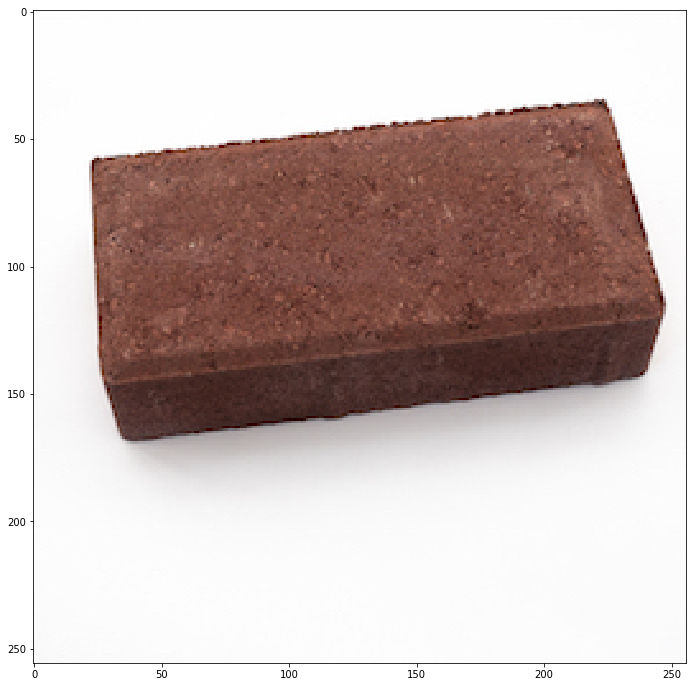

In [6]:
dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
classes = ['ball', 'brick', 'cylinder'] 
dataset_name = dataset_names[0]
image_class = classes[1]
image_paths = glob.glob(data_path + '/' + dataset_name + '/' + image_class + '/*.jpg')
image_path =  image_paths[1]
print(image_path)
image = imread(image_path)
fig = figure(0, (12,12))
imshow(image)
im = []

In [7]:
from util.filters import filter_2d
from util.image import convert_to_grayscale
from util.hough_accumulator import HoughAccumulator


In [8]:
def med_filter(im,kSize):    
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = im
    for i in range(1,im.shape[0]-2):
        for j in range(1,im.shape[1]-2):
            image_patch = im[i-1:i+2, j-1:j+2]
            filtered_image[i, j] = np.median(image_patch)
            
    return filtered_image

In [9]:
def smooth_im(im):
#     im = filter_2d(im,np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
#     im = filter_2d(im,np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]))
#     mea= filter_2d(im,np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]]))
    return med_filter(im,3)

In [10]:
def im_dil(im,kernel):
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H, W), dtype = 'float64')
    for i in range(1,im.shape[0]-2):
        for j in range(1,im.shape[1]-2):
            image_patch = im[i-1:i+2, j-1:j+2]
            a = np.sum(np.multiply(image_patch, kernel))
            if a>=1:
                filtered_image[i,j]=1
            #filtered_image[i, j] = 1
            
    return filtered_image

def im_ero(im,kernel):
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H, W), dtype = 'float64')
    for i in range(1,im.shape[0]-2):
        for j in range(1,im.shape[1]-2):
            image_patch = im[i-1:i+2, j-1:j+2]
            a = np.sum(np.multiply(image_patch, kernel))
            if a==5:
                filtered_image[i,j]=1
            
    return filtered_image

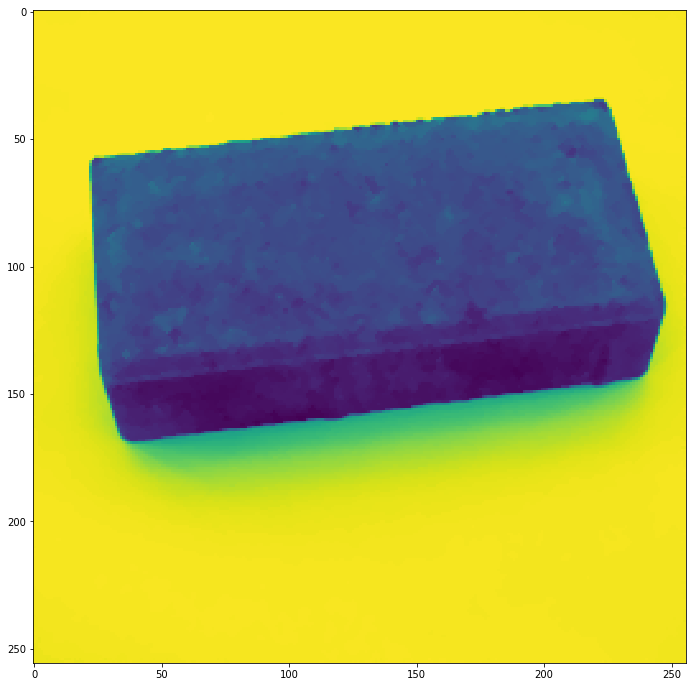

In [13]:
im = convert_to_grayscale(image)
med = smooth_im(im)
# imshow(im,cmap='gray')
fig = figure(0, (12,12))
# fig.add_subplot(1,2,1)
imshow(med)
# fig.add_subplot(1,2,2)


In [11]:
def canny_edge(im):
    #Implement Sobel kernels as numpy arrays
    Kx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    
    Gx = filter_2d(im,Kx)
    Gy = filter_2d(im,Ky)
    #Compute Gradient Magnitude:
    gm = np.sqrt(Gx**2+Gy**2)
    #Arctan2 works a little better here, allowing us to avoid dividing by zero:
    gd = np.arctan2(Gy, Gx)
#     return gm
    gLocalMax=gm
    
    for row in range(1,gm.shape[0]-2):
        for col in range(1,gm.shape[1]-2):
            v= gm[row][col]
            theta = gd[row][col]
            if (theta>=(-pi/8.0) and theta<(pi/8.0)) and (v<gm[row][col-1] or v<gm[row][col+1]):
                gLocalMax[row][col]=0
            elif (theta>=(pi/8.0) and theta<((3*pi)/8.0)) and ((v<gm[row-1][col-1] or v<gm[row+1][col+1])):
                gLocalMax[row][col]=0
            elif (theta>=((3*pi)/8.0) and theta<((5*pi)/8.0)) and (v<gm[row-1][col] or v<gm[row+1][col]):
                gLocalMax[row][col]=0
            elif (theta>=((5*pi)/8.0) and theta<((7*pi)/8.0)) and (v<gm[row+1][col-1] or v<gm[row-1][col+1]):
                gLocalMax[row][col]=0
            elif ((theta>=((7*pi)/8.0) or theta<((-7*pi)/8.0)) and ((v<gm[row][col-1] or v<gm[row][col+1]))):
                gLocalMax[row][col]=0 
            elif (theta>=((-7*pi)/8.0) and theta<((-5*pi)/8.0)) and ((v<gm[row-1][col-1] or v<gm[row+1][col+1])):
                gLocalMax[row][col]=0
            elif (theta>=((-5*pi)/8.0) and theta<((-3*pi)/8.0)) and ((v<gm[row-1][col] or v<gm[row+1][col])):
                gLocalMax[row][col]=0
            elif (theta>=((-3*pi)/8.0) and theta<((-pi)/8.0)) and ((v<gm[row+1][col-1] or v<gm[row-1][col+1])):
                gLocalMax[row][col]=0    
    #Double threshold
    strongEdges = (gLocalMax > 200)
    #print(gLocalMax.max())
    #Strong has value 2, weak has value 1
    thresholdedEdges = np.array(strongEdges, dtype=np.uint8) + (gLocalMax > 100)

    #Tracing edges with hysteresis	
    #Find weak edge pixels near strong edge pixels
    finalEdges = strongEdges.copy()
    currentPixels = []
    for r in range(1, gm.shape[0]-2):
        for c in range(1, gm.shape[1]-2):
            if thresholdedEdges[r, c] != 1:
                continue #Not a weak pixel
            #Get 3x3 patch	
            localPatch = thresholdedEdges[r-1:r+2,c-1:c+2]
            #print(localPatch.shape)
            patchMax = localPatch.max()
            if patchMax == 2: 
                currentPixels.append((r, c))
                finalEdges[r, c] = 1
    return gm,finalEdges,gLocalMax

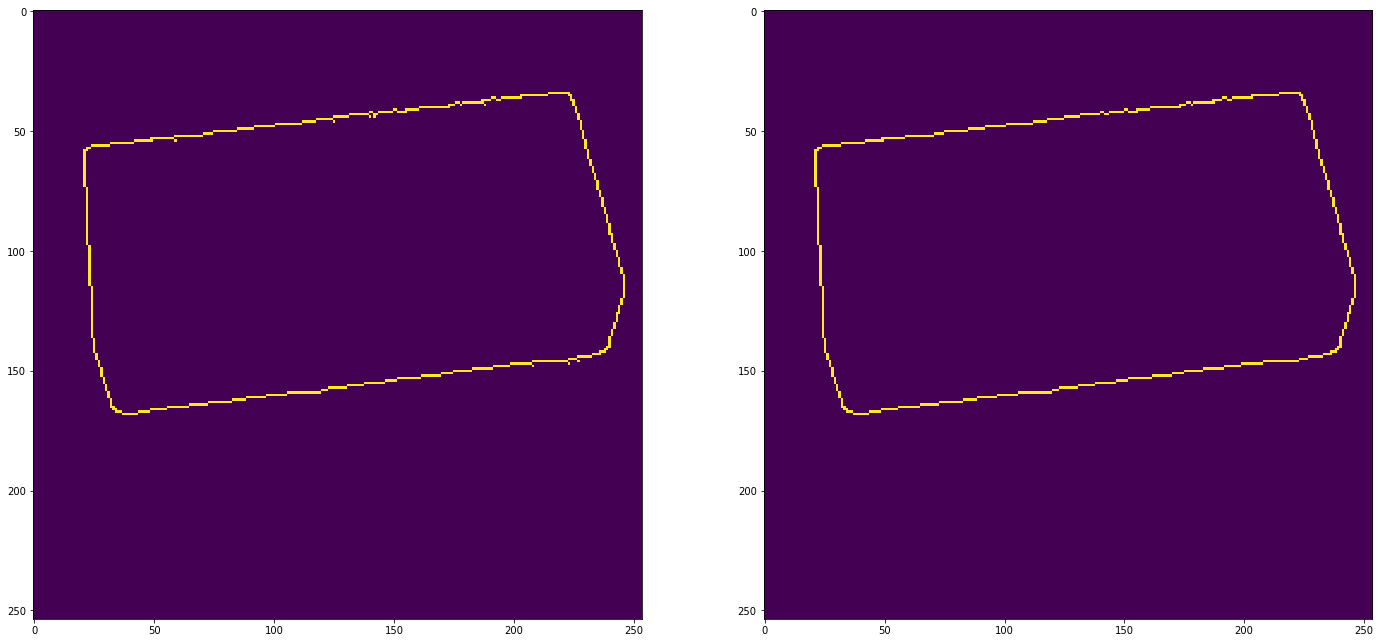

In [15]:
gm,f,gl = canny_edge(med)
fig = figure(0, (24,24))
fig.add_subplot(1,2,1)
imshow(f)
fig.add_subplot(1,2,2)
imshow(gm>200)

In [16]:
def tune_thresh(thresh = 200,h = 255):
    fig = figure(0, (8,8))
    #Double threshold
    strongEdges = (gl > h)
    #print(gLocalMax.max())
    #Strong has value 2, weak has value 1
    thresholdedEdges = np.array(strongEdges, dtype=np.uint8) + (gl > thresh)

    #Tracing edges with hysteresis	
    #Find weak edge pixels near strong edge pixels
    finalEdges = strongEdges.copy()
    currentPixels = []
    for r in range(1, gm.shape[0]-2):
        for c in range(1, gm.shape[1]-2):
            if thresholdedEdges[r, c] != 1:
                continue #Not a weak pixel
            #Get 3x3 patch	
            localPatch = thresholdedEdges[r-1:r+2,c-1:c+2]
            #print(localPatch.shape)
            patchMax = localPatch.max()
            if patchMax == 2: 
                currentPixels.append((r, c))
                finalEdges[r, c] = 1
    imshow(finalEdges)
def tune_thresh_f(thresh = 200):
    fig = figure(0, (8,8))
    imshow(gm > thresh)

In [17]:
interact(tune_thresh, thresh = (0, 255, 1), h = (0,255,1))

interactive(children=(IntSlider(value=200, description='thresh', max=255), IntSlider(value=255, description='h…

<function __main__.tune_thresh(thresh=200, h=255)>

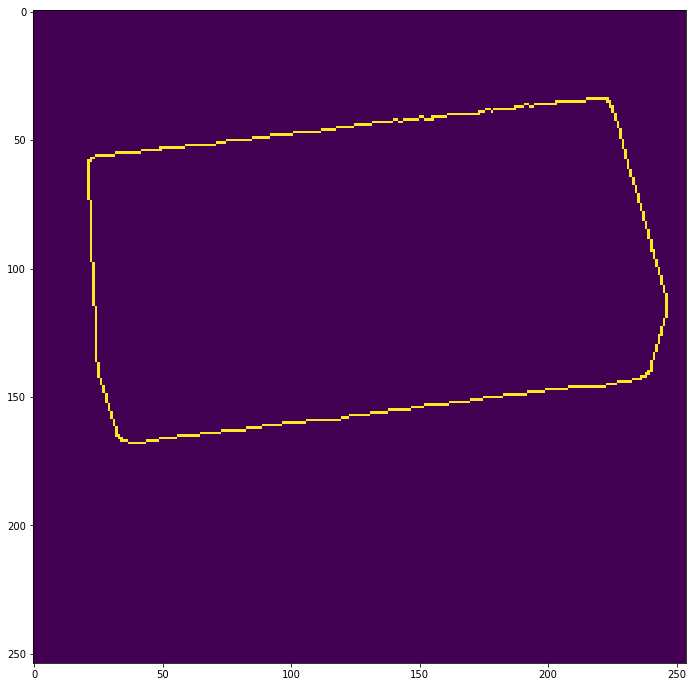

In [18]:
im = im_dil(gm>200,np.array([[0,1,0],[1,1,1],[0,1,0]]))
im = im_ero(im,np.array([[0,1,0],[1,1,1],[0,1,0]]))
fig = figure(0, (12,12))
imshow(im)

In [19]:
edges = im

In [20]:
# edges = gm>150

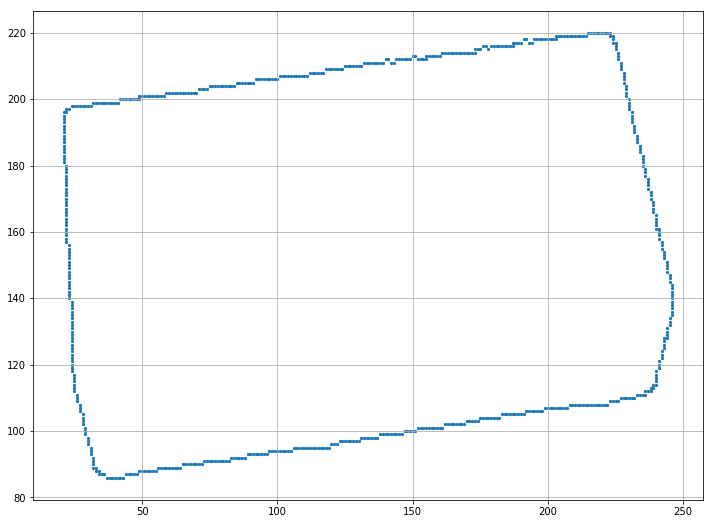

In [21]:
y_coords, x_coords = np.where(edges)
fig = figure(0, (12,9))
scatter(x_coords, edges.shape[0] - y_coords, s = 5)
grid(1)

In [22]:
#How many bins for each variable in parameter space?
phi_bins = 256
theta_bins = 256

accumulator = np.zeros((phi_bins, theta_bins))

In [23]:
rho_min = -edges.shape[0]
rho_max = edges.shape[1]

theta_min = 0
theta_max = np.pi

#Compute the rho and theta values for the grids in our accumulator:
rhos = np.linspace(rho_min, rho_max, accumulator.shape[0])
thetas = np.linspace(theta_min, theta_max, accumulator.shape[1])

In [24]:
y_coords_flipped = edges.shape[0] - y_coords
hough = HoughAccumulator(theta_bins,phi_bins,rho_min,rho_max)
accumulator = hough.accumulate(x_coords, y_coords_flipped)


In [25]:
# def tune_thresh(bins = 128):
#     hough = HoughAccumulator(bins,bins,rho_min,rho_max)
#     accumulator = hough.accumulate(x_coords, y_coords_flipped)
#     fig = figure(0, (8,8))
#     imshow(accumulator)

In [26]:
# interact(tune_thresh, bins = (0, 256, 1))

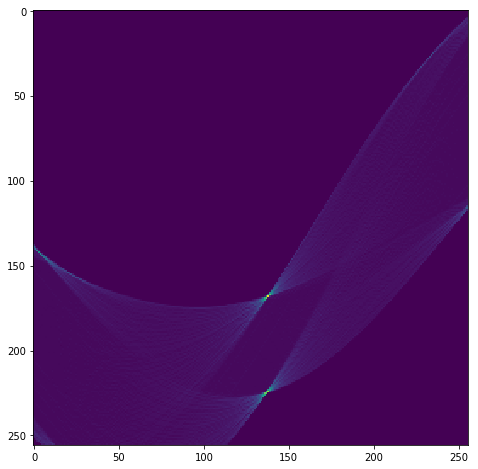

In [27]:
fig = figure(0, (8,8))
imshow(accumulator);

In [28]:
max_value = np.max(accumulator)
max_value

153.0

In [29]:
def tune_thresh(relative_thresh = 0.6):
    fig = figure(0, (8,8))
    imshow(accumulator > relative_thresh * max_value)

In [30]:

interact(tune_thresh, relative_thresh = (0, 1, 0.05))

interactive(children=(FloatSlider(value=0.6, description='relative_thresh', max=1.0, step=0.05), Output()), _d…

<function __main__.tune_thresh(relative_thresh=0.6)>

In [31]:
relative_thresh = 0.60

#Indices of maximum theta and rho values
rho_max_indices, theta_max_indices,  = np.where(accumulator > relative_thresh * max_value)

In [32]:
theta_max_indices, rho_max_indices

(array([139, 138, 136, 137, 139, 137, 138, 136, 137, 136], dtype=int64),
 array([167, 168, 169, 169, 223, 224, 224, 225, 225, 226], dtype=int64))

In [33]:
thetas_max = thetas[theta_max_indices]
rhos_max = rhos[rho_max_indices]
thetas_max, rhos_max

(array([1.712476  , 1.70015602, 1.67551608, 1.68783605, 1.712476  ,
        1.68783605, 1.70015602, 1.67551608, 1.68783605, 1.67551608]),
 array([ 78.69019608,  80.68235294,  82.6745098 ,  82.6745098 ,
        190.25098039, 192.24313725, 192.24313725, 194.23529412,
        194.23529412, 196.22745098]))

In [34]:
pts = []
for i in range(0,rhos_max.shape[0]):
    pts.append((rhos_max[i],thetas_max[i]))

In [35]:
def dist2(p1, p2):
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

def fuse(points, d):
    ret = []
    d2 = d * d
    n = len(points)
    taken = [False] * n
    for i in range(n):
        if not taken[i]:
            count = 1
            point = [points[i][0], points[i][1]]
            taken[i] = True
            for j in range(i+1, n):
                if dist2(points[i], points[j]) < d2:
                    point[0] += points[j][0]
                    point[1] += points[j][1]
                    count+=1
                    taken[j] = True
            point[0] /= count
            point[1] /= count
            ret.append((point[0], point[1]))
    return ret

In [36]:
a = fuse(pts,10)
a

[(81.18039215686275, 1.6939960387003785),
 (193.23921568627452, 1.6898893816368625)]

In [37]:
a = fuse(pts,10)
rm = []
tm = []
for i in range(0,len(a)):
    rm.append(a[i][0])
    tm.append(a[i][1])
rm = np.asarray(rm)
tm = np.asarray(tm)

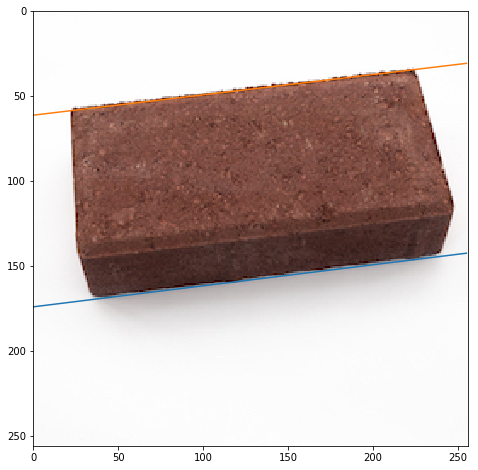

In [38]:
im = image
fig = figure(0, (8,8))
imshow(im)

for theta, rho in zip(tm, rm):
    #x-values to use in plotting:
    xs = np.arange(im.shape[1])
    
    #Check if theta == 0, this would be a vertical line
    if theta != 0:
        ys = -cos(theta)/sin(theta)*xs + rho/sin(theta)
        
    #Special handling for plotting vertical line:
    else:
        xs = rho*np.ones(len(xs))
        ys = np.arange(im.shape[0])
    
    #have to re-flip y-values to reverse the flip we applied initially:
    plot(xs, im.shape[0]-ys)
    
xlim([0, im.shape[0]]);
ylim([im.shape[1], 0]);